## Observations and Insights 

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import collections
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head(), study_results.head()


# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
study_data_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [230]:
# Checking the number of mice.
study_data_df["Mouse ID"].nunique()

249

In [231]:
clean = study_data_df.drop_duplicates()
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [232]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_df[["Mouse ID", "Timepoint"]].count()
rem_dups = study_data_df[["Mouse ID", "Timepoint"]].drop_duplicates()
rem_dups


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [233]:
# Optional: Get all the data for the duplicate mouse ID. 



In [234]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [235]:
# Checking the number of mice in the clean DataFrame.
clean.nunique()["Mouse ID"]


249

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_clean = clean.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#created individual variables for the mean, median, variance, std and sem
mean_tumor_vol = grouped_clean.mean()["Tumor Volume (mm3)"]
tumor_var = grouped_clean.var()["Tumor Volume (mm3)"]
tumor_std = grouped_clean.std()["Tumor Volume (mm3)"]
tumor_sem = grouped_clean.sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.

#tested output for each variable
# grouped_clean
# mean_tumor_vol
# tumor_var
# tumor_std
# tumor_sem

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                          "Tumor Variance": tumor_var,
                          "Standard Deviation": tumor_std,
                          "Standard Error": tumor_sem})
summary_df

,Mean Tumor Volume,Tumor Variance,Standard Deviation,Standard Error
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.368318,42.278090,6.502160,0.514041
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [237]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_2 = clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['var','sem','std','mean','median']})
summary_2


Tumor Volume (mm3)                                          
                            var       sem       std       mean     median
Drug Regimen                                                             
Capomulin             24.947764  0.329346  4.994774  40.675741  41.557809
Ceftamin              39.290177  0.469821  6.268188  52.591172  51.776157
Infubinol             43.128684  0.492236  6.567243  52.884795  51.820584
Ketapril              68.553577  0.603860  8.279709  55.235638  53.698743
Naftisol              66.173479  0.596466  8.134708  54.331565  52.509285
Placebo               61.168083  0.581331  7.821003  54.033581  52.288934
Propriva              42.278090  0.514041  6.502160  52.368318  50.909965
Ramicane              23.486704  0.320955  4.846308  40.216745  40.673236
Stelasyn              59.450562  0.573111  7.710419  54.233149  52.431737
Zoniferol             48.533355  0.516398  6.966589  53.236507  51.818479

## Bar and Pie Charts

In [238]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean.head()

#created new dataframe,grouping by drug regimens; then count the number of timepoints for each regimen
measurements_df = study_data_df.groupby(['Drug Regimen']).count()["Timepoint"]
# measurements_df.sum().unstack()
# measurements = clean[["Drug Regimen","Timepoint"]]
# measurements_grouped = measurements.groupby(["Drug Regimen"]).count()
# measurements_grouped

measurements_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Number of Measurements')

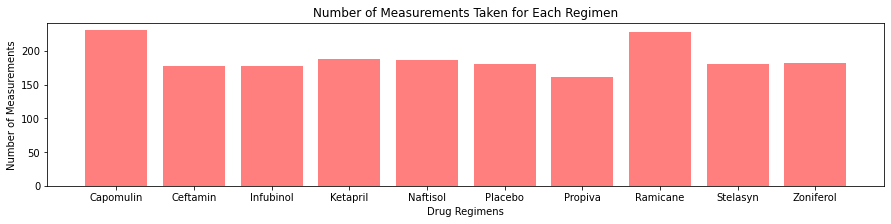

In [239]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#specify the values for the x axis
x_axis = np.arange(len(measurements_df))

#specify how many tick locations there should be
tick_locations = [value for value in x_axis]

#generate the figure size
plt.figure(figsize = (15,3))

#generate the actual bar graph
plt.bar(x_axis,measurements_df,color = 'r', alpha = 0.5)
#specify the name of each bar on the graph (which are the names of each regimen)
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propiva",
                           "Ramicane","Stelasyn","Zoniferol"])
#create title, and axes names
plt.title("Number of Measurements Taken for Each Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")

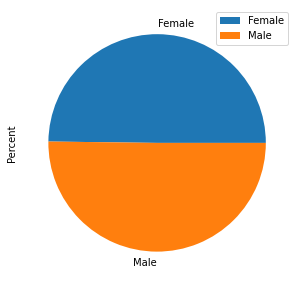

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean[["Mouse ID","Sex"]].drop_duplicates()
sex_counts = gender.groupby("Sex").count()
sex_counts["Percent"] = (sex_counts/249)*100
sex_counts
plot = sex_counts.plot.pie(y="Percent",figsize = (5,5))


([<matplotlib.patches.Wedge at 0x1da862744c0>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

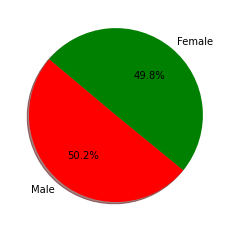

In [241]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [125,124]
colors = ["red","green"]
plt.pie(sizes,labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)


## Quartiles, Outliers and Boxplots

In [298]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#find max timepoint tumor volume for capomulin group
capo_df = study_data_df.loc[study_data_df["Drug Regimen"]=="Capomulin",:]
capo_df
capo_mouse = capo_df.groupby(["Mouse ID"])
capo_mouse.head()
max_capo_tp = capo_mouse.max()["Timepoint"]
max_capo_tp
capo_summary = pd.merge(capo_df,max_capo_tp, on = "Mouse ID", how = "left")
capo_results = capo_summary.loc[capo_summary["Timepoint_x"]==45]
capo_results.head()
del capo_results["Sex"]
del capo_results["Age_months"]
del capo_results["Weight (g)"]
del capo_results["Metastatic Sites"]
del capo_results["Timepoint_y"]

capo_results.head()


capo_tum_vol = rami_results["Tumor Volume (mm3)"]

In [290]:
#find max timepoint tumor volume for ramicane group
rami_df = study_data_df.loc[study_data_df["Drug Regimen"]=="Ramicane",:]
rami_df
rami_mouse = rami_df.groupby(["Mouse ID"])
rami_mouse.head()
max_rami_tp = rami_mouse.max()["Timepoint"]
max_rami_tp
rami_summary = pd.merge(rami_df,max_rami_tp, on = "Mouse ID", how = "left")
rami_results = rami_summary.loc[rami_summary["Timepoint_x"]==45]
rami_results.head()
del rami_results["Sex"]
del rami_results["Age_months"]
del rami_results["Weight (g)"]
del rami_results["Metastatic Sites"]
del rami_results["Timepoint_y"]
rami_results.head()


rami_tum_vol = rami_results["Tumor Volume (mm3)"]

In [292]:
#find max timepoint tumor volume for infubinol group
infu_df = study_data_df.loc[study_data_df["Drug Regimen"]=="Infubinol",:]
infu_mouse = infu_df.groupby(["Mouse ID"])
max_infu_tp = infu_mouse.max()["Timepoint"]
infu_summary = pd.merge(infu_df,max_infu_tp, on = "Mouse ID", how = "left")
infu_results = infu_summary.loc[infu_summary["Timepoint_x"]==45]
infu_results.head()
del infu_results["Sex"]
del infu_results["Age_months"]
del infu_results["Weight (g)"]
del infu_results["Metastatic Sites"]
del infu_results["Timepoint_y"]
infu_results.head()


infu_tum_vol = infu_results["Tumor Volume (mm3)"]

In [283]:
#find max timepoint tumor volume for Ceftamin group
ceft_df = study_data_df.loc[study_data_df["Drug Regimen"]=="Infubinol",:]
ceft_mouse = ceft_df.groupby(["Mouse ID"])
max_ceft_tp = ceft_mouse.max()["Timepoint"]
ceft_summary = pd.merge(ceft_df,max_ceft_tp, on = "Mouse ID", how = "left")
ceft_results = ceft_summary.loc[ceft_summary["Timepoint_x"]==45]
ceft_results.head()
del ceft_results["Sex"]
del ceft_results["Age_months"]
del ceft_results["Weight (g)"]
del ceft_results["Metastatic Sites"]
del ceft_results["Timepoint_y"]
ceft_results.head()

ceft_tum_vol = ceft_results["Tumor Volume (mm3)"]

In [299]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for capo group

capo_q = capo_tum_vol.quantile([.25,.5,.75])
capo_lq = capo_q[0.25]
capo_uq = capo_q[0.75]
capo_iqr = capo_uq - capo_lq

lower_capo = capo_lq - (1.5*capo_iqr)
upper_capo = capo_uq + (1.5*capo_iqr)
print(lower_capo," and ", upper_capo, " could be potential outliers for the capomulin group")

19.690480101250003  and  49.79900043124999  could be potential outliers for the capomulin group


In [295]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for ramicane group

rami_q = rami_tum_vol.quantile([.25,.5,.75])
rami_lq = rami_q[0.25]
rami_uq = rami_q[0.75]
rami_iqr = rami_uq - rami_lq

lower_rami = rami_lq - (1.5*rami_iqr)
upper_rami = rami_uq + (1.5*rami_iqr)
print(lower_rami," and ", upper_rami, " could be potential outliers in the ramicane group")

19.690480101250003  and  49.79900043124999  could be potential outliers in the ramicane group


In [296]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for infubinol group

infu_q = infu_tum_vol.quantile([.25,.5,.75])
infu_lq = infu_q[0.25]
infu_uq = infu_q[0.75]
infu_iqr = infu_uq - infu_lq

lower_infu = infu_lq - (1.5*infu_iqr)
upper_infu = infu_uq + (1.5*infu_iqr)
print(lower_infu," and ", upper_infu, " could be potential outliers for the infubinol group")

55.35777559500001  and  75.08224443499999  could be potential outliers for the infubinol group


In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for infubinol group

infu_q = infu_tum_vol.quantile([.25,.5,.75])
infu_lq = infu_q[0.25]
infu_uq = infu_q[0.75]
infu_iqr = infu_uq - infu_lq

lower_infu = infu_lq - (1.5*infu_iqr)
upper_infu = infu_uq + (1.5*infu_iqr)
print(lower_infu," and ", upper_infu, " could be potential outliers for the infubinol group")

In [301]:
# Put treatments into a list for for loop (and later for plot labels)
x_axis = ["Ramicane","Infubinol","Ceftamin","Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
#I found the concatenate function on www.towardsdatascience.com
new_df = pd.concat([ceft_results,capo_results])
df2 = pd.concat([infu_results, rami_results])
total = pd.concat([new_df, df2])
total


,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,a203,Infubinol,45,67.973419
19,a251,Infubinol,45,65.525743
36,a685,Infubinol,45,66.083066
46,c139,Infubinol,45,72.226731
65,e476,Infubinol,45,62.435404
75,f345,Infubinol,45,60.918767
94,k483,Infubinol,45,66.196912
167,y163,Infubinol,45,67.685569
177,z581,Infubinol,45,62.754451
9,s185,Capomulin,45,23.343598


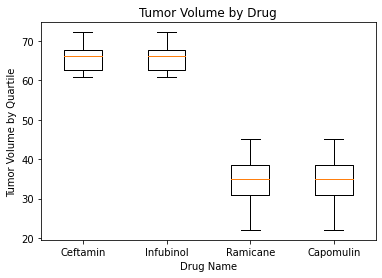

In [310]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [ceft_tum_vol, infu_tum_vol, rami_tum_vol, capo_tum_vol]
#create labels for x-axis
drug_labels = ["Ceftamin", "Infubinol","Ramicane","Capomulin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Drug")
ax1.set_xlabel("Drug Name")
ax1.set_ylabel("Tumor Volume by Quartile")

ax1.boxplot(boxplot_data,labels=["Ceftamin", "Infubinol","Ramicane","Capomulin"])
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
